In [25]:
import pandas as pd

eb_data = pd.read_csv("./test_dataset.csv")

In [26]:
eb_data.head()

,year,month,NODE_A,NODE_B,EDGE_TYPE,AMOUNT,NUM
0,2021,6,GR4245127333270251817593457,GR5766216816478606295050642,INCOMING_REMITTANCE,9233.00,86
1,2023,6,GR1074717759122361909134846,GR6935930597803312325061433,INTERNAL_TRANSFER,3091.78,72
2,2022,1,GR5216949985135982722013681,GR7715728073616281940280870,INCOMING_REMITTANCE,5876.71,51
3,2019,12,GR2380467553238455563438492,GR5566655654817213391002360,OUTGOING_REMITTANCE,2779.02,4
4,2019,2,GR5445306273963824634582365,GR0715999537008986459541902,INTERNAL_TRANSFER,4916.75,83


In [27]:
eb_data_filtered = eb_data[["NODE_A", "NODE_B", "AMOUNT"]].iloc[:1000]

In [29]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

G = nx.from_pandas_edgelist(eb_data_filtered, source='NODE_A', target='NODE_B', edge_attr='AMOUNT')

In [31]:
# Print basic information about the graph
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

num_nodes, num_edges

(1900, 1000)

# Centrality methods

**Method 1**: Degree Centrality

Degree Centrality measures the number of edges connected to a node. In the context of AML, nodes with high degree centrality may indicate suspicious activity, as they may be involved in a large number of transactions.

*Why it works*: Nodes with high degree centrality may be hubs for money laundering, as they're connected to many other nodes, making it easier to obscure the source of funds.

In [32]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Identify nodes with high degree centrality
suspicious_nodes = [node for node, degree in degree_centrality.items() if degree > 0.5]

#print("Suspicious nodes:", suspicious_nodes)
max(list(degree_centrality.values()))

0.001579778830963665

**Method 2**: Betweenness Centrality

Betweenness Centrality measures the extent to which a node lies on the shortest paths between other nodes. In AML detection, nodes with high betweenness centrality may indicate key players in money laundering schemes.

_Why it works_: Nodes with high betweenness centrality may be controlling the flow of money, making them crucial for money laundering operations.

In [35]:
## Very slow execution time
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Identify nodes with high betweenness centrality
suspicious_nodes = [node for node, betweenness in betweenness_centrality.items() if betweenness > 0.5]

#print("Suspicious nodes:", suspicious_nodes)
max(list(betweenness_centrality.values()))

2.7744622953348524e-06

**Method 3**: Closeness Centrality

Closeness Centrality measures the average shortest distance from a node to all other nodes in the graph. In AML detection, nodes with high closeness centrality may indicate key players in money laundering schemes.

*Why it works*: Nodes with high closeness centrality are more likely to be involved in money laundering, as they have shorter distances to other nodes, making it easier to transfer funds.

In [36]:
#Calculate closeness centrality
closeness = nx.closeness_centrality(G)

#Identify nodes with high closeness centraligy
suspicious_nodes = [node for node, closeness in closeness.items() if closeness > 0.5]

#print("Suspicious nodes:", suspicious_nodes)
max(list(closeness.values()))

0.001685097419694576

**Method 4**: PageRank Centrality

PageRank Centrality measures the importance of a node in a graph. In AML detection, nodes with high PageRank centrality may indicate key players in money laundering schemes.

*Why it works*:  Nodes with high PageRank centrality are more likely to be involved in money laundering, as they have higher importance in the graph.


In [37]:
#Calculate closeness centrality
pagerank = nx.pagerank(G)

#Identify nodes with high closeness centraligy
suspicious_nodes = [node for node, pagerank in pagerank.items() if pagerank > 0.5]

#print("Suspicious nodes:", suspicious_nodes)
max(list(pagerank.values()))

0.0010001719431850875

**Method 5**: Eigenvector Centrality

Eigenvector Centrality measures the influence of a node in a graph. In AML detection, nodes with high eigenvector centrality may indicate key players in money laundering schemes.

_Why it works_: Nodes with high eigenvector centrality have more influence over the graph, making them more likely to be involved in money laundering.

In [41]:
#fails to converge
# eigenvector = nx.eigenvector_centrality(G)
# suspicious_nodes = [node for node, eigenvector in eigenvector.items() if eigenvector > 0.5]
# print("Suspicious nodes:", suspicious_nodes)

# Community Methods

**Method 1**: Louvain Algorithm


In [48]:

# Calculate community structure using Louvain algorithm
nx.community.louvain_communities(G, seed=123)


[{'GR4245127333270251817593457', 'GR5766216816478606295050642'},
 {'GR1074717759122361909134846', 'GR6935930597803312325061433'},
 {'GR5216949985135982722013681', 'GR7715728073616281940280870'},
 {'GR2380467553238455563438492', 'GR5566655654817213391002360'},
 {'GR0715999537008986459541902', 'GR5445306273963824634582365'},
 {'GR2596751524051401088527061',
  'GR4473049565097915151649148',
  'GR6741096337204107193957026',
  'GR6834150469315852439996676'},
 {'GR1885420721136026056034060',
  'GR5369884635367896550991663',
  'GR9234717038031513883680016'},
 {'GR3961290346068476388535350', 'GR8477457103928663886844310'},
 {'GR3116094273418092348703354', 'GR4966285232278170353783807'},
 {'GR3394019423875372645062774', 'GR7171181182274179835725165'},
 {'GR4931799736531875426554853',
  'GR6212003693260620163212531',
  'GR7746634267991924292813131'},
 {'GR0597933073988538786632332', 'GR5925134143523326734180089'},
 {'GR6224747440024663936105965', 'GR6986717029524205360724688'},
 {'GR390041127296

**Method 2**: Girvan-Newman


In [46]:
from networkx.algorithms import community

# Detect communities using the Girvan-Newman method
comp = community.girvan_newman(G)
communities = tuple(sorted(c) for c in next(comp))

print("Detected Communities:", communities)

Detected Communities: (['GR4245127333270251817593457', 'GR5766216816478606295050642'], ['GR1074717759122361909134846', 'GR6935930597803312325061433'], ['GR5216949985135982722013681', 'GR7715728073616281940280870'], ['GR2380467553238455563438492', 'GR5566655654817213391002360'], ['GR0715999537008986459541902', 'GR5445306273963824634582365'], ['GR2596751524051401088527061', 'GR4473049565097915151649148', 'GR6741096337204107193957026', 'GR6834150469315852439996676'], ['GR1885420721136026056034060', 'GR5369884635367896550991663', 'GR9234717038031513883680016'], ['GR3961290346068476388535350', 'GR8477457103928663886844310'], ['GR3116094273418092348703354', 'GR4966285232278170353783807'], ['GR3394019423875372645062774', 'GR7171181182274179835725165'], ['GR4931799736531875426554853', 'GR6212003693260620163212531', 'GR7746634267991924292813131'], ['GR0597933073988538786632332', 'GR5925134143523326734180089'], ['GR6224747440024663936105965', 'GR6986717029524205360724688'], ['GR39004112729621746

**Method 3**: Asynchronous Label Propagation

Asynchronous Label Propagation is a community detection method that uses a label propagation approach to detect communities.

Why it works: This method is effective in detecting communities in large-scale networks and is relatively fast.

In [49]:
communities = nx.algorithms.community.asyn_lpa_communities(G)
suspicious_communities = [community for community in communities if len(community) > 10]
print("Suspicious communities:", suspicious_communities)

Suspicious communities: []


**Method 4**: K-Clique Percolation

K-Clique Percolation is a community detection method that uses k-cliques to detect communities.

Why it works: This method is effective in detecting communities in networks with dense regions.

In [54]:
list(nx.community.k_clique_communities(G, 2))

frozenset({'GR2489505666684860629872786', 'GR9463620668913654752967855'})

**Method 5**: Flow-Based Analysis

Flow-based analysis measures the flow of transactions through the network to identify __circular__ transactions or abnormal flows.

In [56]:
cycles = list(nx.simple_cycles(G))

print("Detected Cycles:", cycles)



Detected Cycles: []


**Method 6**: Greedy Modularity Maximization

Greedy Modularity Maximization is a community detection method that uses a greedy approach to maximize modularity.

In [57]:
communities = nx.algorithms.community.greedy_modularity_communities(G)
suspicious_communities = [community for community in communities if len(community) > 10]
print("Suspicious communities:", suspicious_communities)

Suspicious communities: []


**Method 7**: Anomaly Detection (Local Outlier Factor)

Anomaly Detection helps identify nodes that are significantly different from their neighbors. In AML detection, these anomalies may indicate unusual transaction patterns.

https://ar5iv.labs.arxiv.org/html/2403.10802

### Isolation Forest Algorithm 
Return the anomaly score of each sample using the IsolationForest algorithm

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

Why it works: Anomaly detection can highlight nodes that don't conform to the typical transaction patterns, which may indicate money laundering activity.


In [70]:
from sklearn.ensemble import IsolationForest

closeness = nx.closeness_centrality(G)
degree = nx.degree_centrality(G)
katz = nx.katz_centrality(G, alpha=0.1)  # alpha is the decay factor

# Create node features with degree, closeness, and eigenvector centrality
node_features = [
    [G.degree(node), closeness[node], degree[node], katz[node]]
    for node in G.nodes()
]

# Train an Isolation Forest model to detect anomalous nodes
iforest = IsolationForest(contamination=0.1, random_state=42)  # Assume 10% contamination
iforest.fit(node_features)

# Identify anomalous nodes
anomaly_scores = iforest.decision_function(node_features)
anomaly_threshold = 0  # Set the threshold for identifying anomalies
anomaly_nodes = [node for node, score in zip(G.nodes(), anomaly_scores) if score < anomaly_threshold]

print("Anomalous Nodes:", anomaly_nodes)

Anomalous Nodes: ['GR6834150469315852439996676', 'GR4473049565097915151649148', 'GR9234717038031513883680016', 'GR6212003693260620163212531', 'GR6741096337204107193957026', 'GR4033033907331172262932687', 'GR5031950971587307406619958', 'GR6433441812245347460177242', 'GR0918854986038497089677082', 'GR6940241579675623703972972', 'GR8957835866578217314670192', 'GR5435785095002479848112336', 'GR7531927975569561630396720', 'GR2851569126630416970269650', 'GR9502601199214399563550997', 'GR8081275955027922867905587', 'GR1975905316274156653562081', 'GR2267241729778550015581229', 'GR9492959922170572407892874', 'GR8047842913074239576363289', 'GR2514696484394270843215230', 'GR8891733163588533549142513', 'GR9246283650831531040088006', 'GR8537673896873080721771449', 'GR4734242142844967868912902', 'GR6021597945337172054124487', 'GR4602152114155898628941180', 'GR7109299977017221165960215', 'GR4338953129856294513301783', 'GR8921143478997274982161062', 'GR5905579608919051968318563', 'GR838315471252850648

In [71]:
anomaly_scores

array([0.12803705, 0.12803705, 0.12803705, ..., 0.12803705, 0.12803705,
       0.12803705])

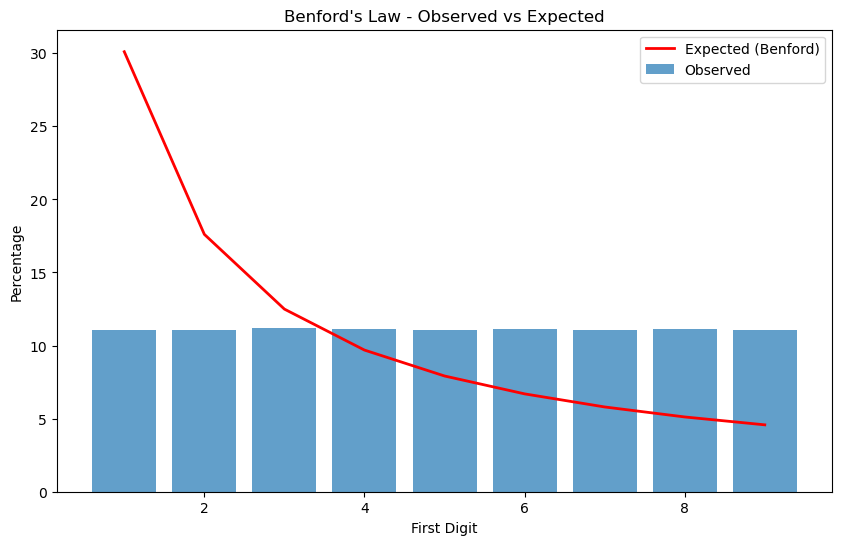

In [79]:
import collections
import math
import matplotlib.pyplot as plt

# Extract the first digit from each amount
first_digits = eb_data['AMOUNT'].astype(str).str[0].astype(int)

# Count the frequency of each first digit
digit_count = collections.Counter(first_digits)

# Expected distribution according to Benford's Law
benford_dist = {d: math.log10(1 + 1/d) for d in range(1, 10)}

# Convert to percentage
observed_dist = {key: val / len(first_digits) * 100 for key, val in digit_count.items()}
expected_dist = {key: val * 100 for key, val in benford_dist.items()}

# Plotting observed vs. expected distribution
plt.figure(figsize=(10, 6))
plt.bar(observed_dist.keys(), observed_dist.values(), alpha=0.7, label='Observed')
plt.plot(list(expected_dist.keys()), list(expected_dist.values()), 'r-', linewidth=2, label='Expected (Benford)')
plt.xlabel('First Digit')
plt.ylabel('Percentage')
plt.title('Benford\'s Law - Observed vs Expected')
plt.legend()
plt.show()

In [96]:
eb_data

,year,month,NODE_A,NODE_B,EDGE_TYPE,AMOUNT,NUM
0,2021,6,GR4245127333270251817593457,GR5766216816478606295050642,INCOMING_REMITTANCE,9233.00,86
1,2023,6,GR1074717759122361909134846,GR6935930597803312325061433,INTERNAL_TRANSFER,3091.78,72
2,2022,1,GR5216949985135982722013681,GR7715728073616281940280870,INCOMING_REMITTANCE,5876.71,51
3,2019,12,GR2380467553238455563438492,GR5566655654817213391002360,OUTGOING_REMITTANCE,2779.02,4
4,2019,2,GR5445306273963824634582365,GR0715999537008986459541902,INTERNAL_TRANSFER,4916.75,83
...,...,...,...,...,...,...,...
999995,2019,12,GR4739465493525941758526437,GR0445155657273777145768126,INTERNAL_TRANSFER,4822.91,15
999996,2019,12,GR9075563413802560786148560,GR8754606248826521317871175,INTERNAL_TRANSFER,8559.48,22
999997,2023,8,GR0614699041283793462883126,GR6289183528544059089913588,INCOMING_REMITTANCE,7189.85,7
999998,2021,11,GR4153938985824642316499033,GR1930916036663521420272832,INCOMING_REMITTANCE,545.82,15


1. Histogram:
This plot shows the distribution of the number of transactions. It provides an overview of the data's general shape and distribution.
2. Cumulative Distribution Function (CDF):
The CDF plot helps visualize the proportion of transactions at or below a given value. This cumulative perspective can indicate if the distribution has a heavy tail, characteristic of Pareto distributions.
3. Pareto Distribution Fit:
The histogram is overlaid with a fitted Pareto distribution, highlighting the estimated shape parameter "alpha." This plot demonstrates how well the fitted Pareto distribution aligns with the data.
4. Log-Log Plot:
In this plot, if the distribution is a straight line, it suggests that the data has a Pareto-like distribution. Deviations from a straight line indicate other underlying distribution patterns.
Based on these plots, you can evaluate whether the data follows a Pareto distribution. If the Pareto fit aligns closely with the histogram and the log-log plot approximates a straight line, it's likely that the distribution is Pareto-like.

These plots are useful for exploring whether your data matches a Pareto distribution and can guide further analysis or fitting other distributions if needed.

Text(0, 0.5, 'Log Density')

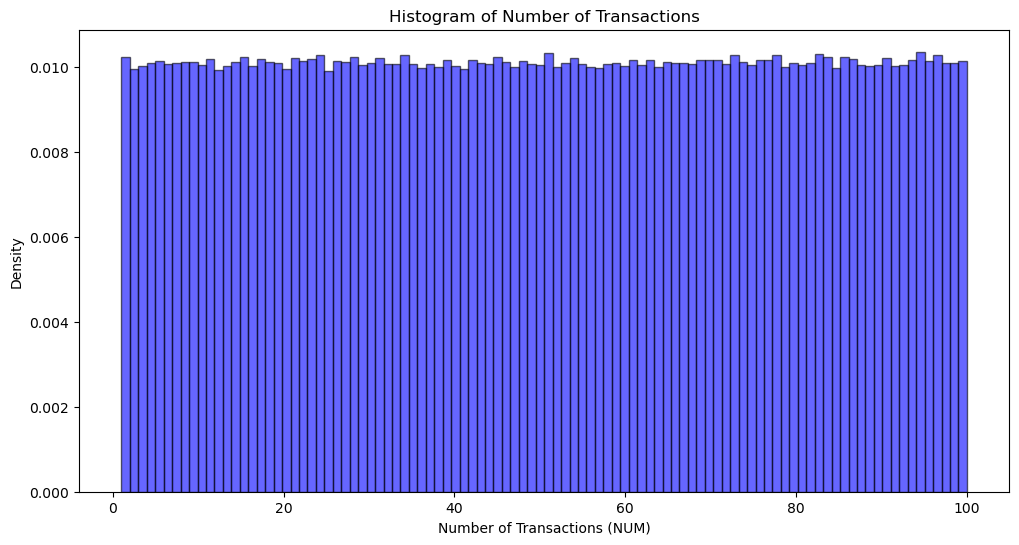

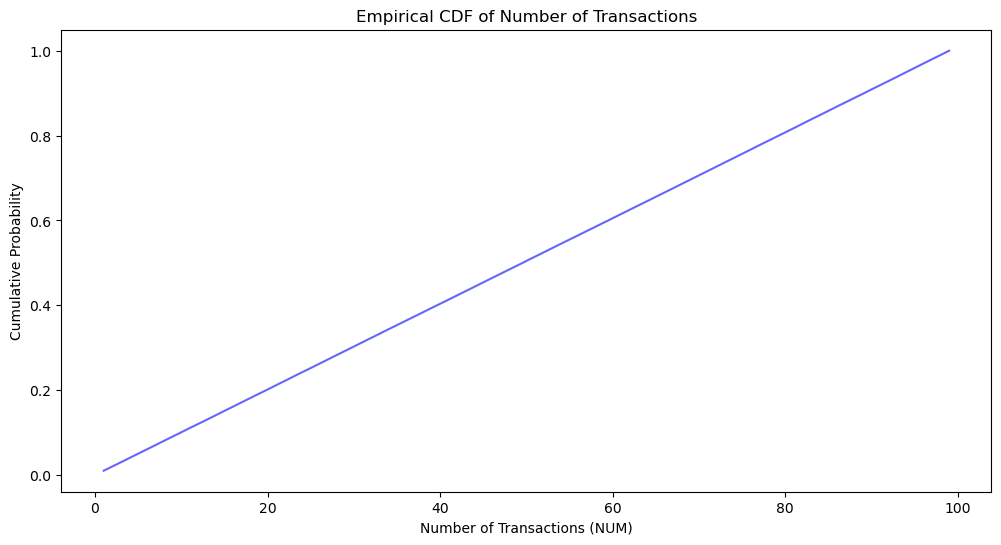

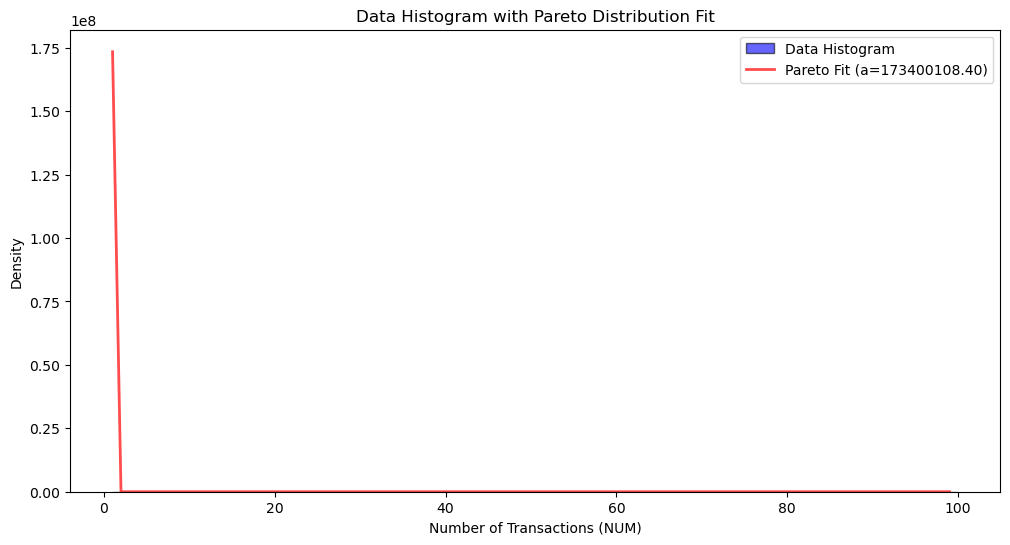

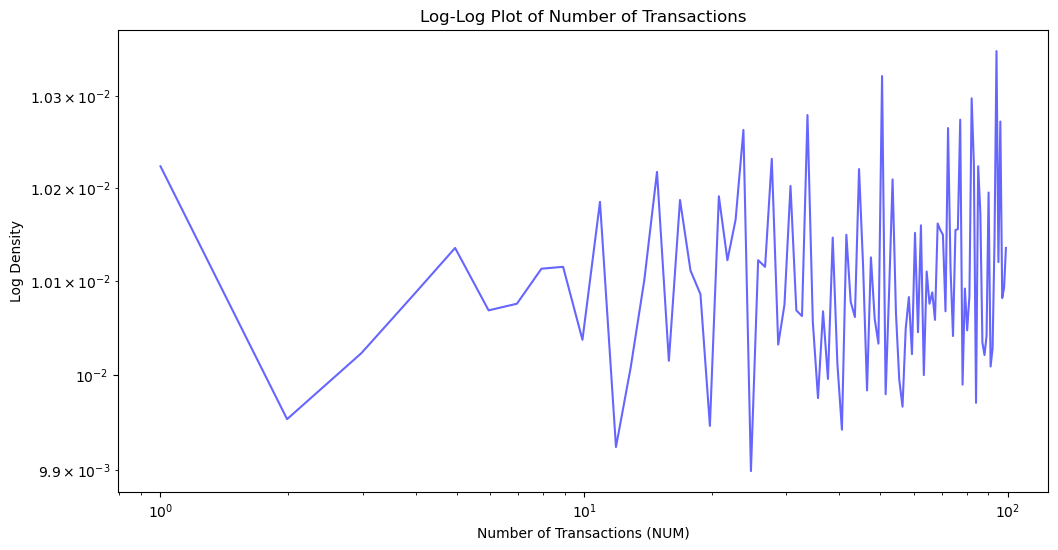

In [99]:
from scipy.stats import pareto
import numpy as np
import matplotlib.pyplot as plt

# Plot histogram to visualize distribution
plt.figure(figsize=(12, 6))
plt.hist(eb_data['NUM'], bins=100, density=True, alpha=0.6, color='b', edgecolor='black')
plt.title('Histogram of Number of Transactions')
plt.xlabel('Number of Transactions (NUM)')
plt.ylabel('Density')

# Calculate the CDF
values, base = np.histogram(eb_data['NUM'], bins=100, density=True)
cumulative = np.cumsum(values) / np.cumsum(values).max()

# Plot CDF
plt.figure(figsize=(12, 6))
plt.plot(base[:-1], cumulative, 'b', alpha=0.6, label='Empirical CDF')
plt.title('Empirical CDF of Number of Transactions')
plt.xlabel('Number of Transactions (NUM)')
plt.ylabel('Cumulative Probability')

# Fit a Pareto distribution to the data to estimate "alpha"
shape_param = pareto.fit(eb_data['NUM'])[0]

# Generate values for Pareto distribution using the fitted parameter
pareto_values = pareto.pdf(base[:-1], shape_param)

# Plot Pareto distribution for comparison
plt.figure(figsize=(12, 6))
plt.hist(eb_data['NUM'], bins=100, density=True, alpha=0.6, color='b', edgecolor='black', label='Data Histogram')
plt.plot(base[:-1], pareto_values, 'r-', lw=2, alpha=0.7, label=f'Pareto Fit (a={shape_param:.2f})')
plt.title('Data Histogram with Pareto Distribution Fit')
plt.xlabel('Number of Transactions (NUM)')
plt.ylabel('Density')
plt.legend()

# Create log-log plot to visualize Pareto distribution
plt.figure(figsize=(12, 6))
plt.loglog(base[:-1], values, 'b-', alpha=0.6, label='Data Log-Log Plot')
plt.title('Log-Log Plot of Number of Transactions')
plt.xlabel('Number of Transactions (NUM)')
plt.ylabel('Log Density')